[View in Colaboratory](https://colab.research.google.com/github/scumabo/Machine_learning_fundimentals/blob/master/1_Linear_regression.ipynb)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Linear regression can be treated as the simplest neural network with only one neural without activation function. Given the data matrix $X \in (m, n)$, where $m$ and $n$ are number of examples and features respectively. Let $x^{(i)}  \in \mathbb{R}^n$ denotes the input for one example. Then, the computational graphs are:

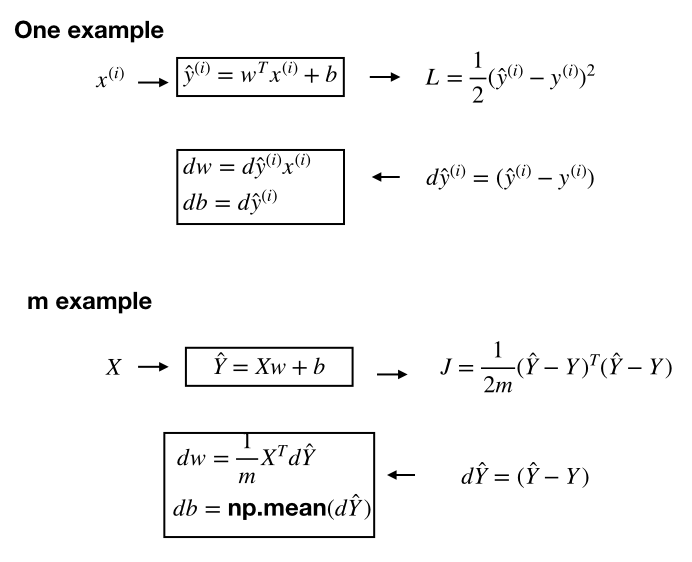

In [2]:
from IPython.display import Image
Image('LinearReg.png')

In [0]:
def initialize_parameters(n):
    """
    Argument:
    n -- number of features (dimensions)
    
    Returns:
    parameters -- dictionary containing:
                w -- weight matrix (n, 1)
                b -- bias (scalar)
    """
    np.random.seed(1)
    
    w = np.random.randn(n, 1) * 0.01
    b = 0
    
    parameters = {"w" : w,
                  "b" : b}
    
    return parameters

In [0]:
def forward_prop(X, parameters):
    """
    Argument:
    X -- data (m, n)
    parameters -- w and b
    
    Returns:
    Y_hat -- current regression
    """
    w = parameters["w"]
    b = parameters["b"]
    
    Y_hat = np.dot(X, w) + b
    
    assert(Y_hat.shape == (X.shape[0], 1))
    
    return Y_hat

In [0]:
def l2_cost(Y_hat, Y):
    """
    Argument:
    Y_hat -- predict values (m, 1)
    Y --     true values (m, 1)
    
    Returns:
    l2 (MSE) cost
    """
    m = Y.shape[0]
    return np.dot((Y_hat - Y).T, (Y_hat - Y)) / (2*m)

In [0]:
def backward_prop(X, Y, Y_hat):
    """
    Argument:
    X -- data (m, n)
    Y -- true values (m, 1)
    Y_hat -- predict values (m, 1)
    """
    
    m = Y.shape[0]
    
    dY_hat = Y_hat - Y
    dw = np.dot(X.T, dY_hat)/m
    db = np.mean(dY_hat, keepdims = True)
    
    assert(dw.shape == (X.shape[1], 1))
    assert(db.shape == (1, 1))
    
    return dw, db

In [0]:
def update_parameters(parameters, dw, db, learning_rate):
    """
    Argument:
    parameters -- w and b
    
    Return:
    parameters
    """
    parameters["w"] = parameters["w"] - learning_rate * dw
    parameters["b"] = parameters["b"] - learning_rate * db
    
    return parameters

In [0]:
def linear_regression_model(X, Y, learning_rate = 0.0075, num_iterations = 1000, print_cost = False):
    
    np.random.seed(1)
    (m, n) = (X.shape[0], X.shape[1])
    costs = []
    
    parameters = initialize_parameters(n)
    
    for i in range(num_iterations):
        Y_hat = forward_prop(X, parameters)
        cost = l2_cost(Y_hat, Y)
        dw, db = backward_prop(X, Y, Y_hat)
        parameters = update_parameters(parameters, dw, db, learning_rate)
        
        if print_cost and i % 10 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
            
        costs.append(cost)
    
    # plot the cost
#     plt.plot(np.squeeze(costs))
#     plt.ylabel('cost')
#     plt.xlabel('iterations')
#     plt.title("learning rate = " + str(learning_rate))
#     plt.show()
    
    return parameters

## Univariate data

In [0]:
data = pd.read_csv('ex1data1.txt', header=None).values
X = data[:, [0]]
Y = data[:, [1]]

parameters = linear_regression_model(X, Y, learning_rate = 0.0045, num_iterations = 5000, print_cost = False)

## Compare with Scikit-learn implementation

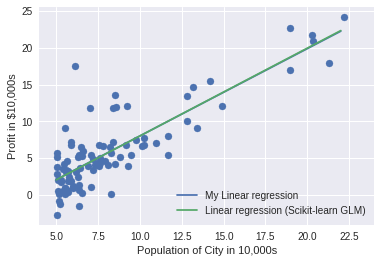

In [10]:
xx = np.arange(5, 23)
yy = parameters["w"] * xx + parameters["b"]

plt.scatter(X, Y)
plt.plot(xx, yy.T, label='My Linear regression')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X, Y)
plt.plot(xx, (regr.intercept_+regr.coef_*xx).T, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [0]:
path = 'ex1data2.txt'
data = pd.read_csv(path, header=None).values
X = data[:, 0:-1]
Y = data[:, [-1]]
X = (X - np.mean(X)) / np.std(X)

parameters = linear_regression_model(X, Y, learning_rate =   0.0045, num_iterations = 5000, print_cost = False)

In [12]:
regr = LinearRegression()
regr.fit(X, Y)
print("my weights = " + str(parameters["w"]))
print("sklearn weights = " + str(regr.coef_))

my weights = [[ 153804.65020628]
 [-102105.26103648]]
sklearn weights = [[  159125.15353818 -9988017.38933274]]
